# Credit Crad Fraud Detetion Project
### 1. Problem Definition:
- Goal: identify potentially fraudulent transactions.

### 2. Key Features:
- `id` : Unique identifier for each transaction
- `V1-V28` : Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- `Amount` : The transaction amount
- `Class` : Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## Load Dataset & Get Overview of the Data

In [63]:
data = pd.read_csv('Data/creditcard_2023.csv', sep = ',')
data

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [13]:
data.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
print("Train Dataset :", data.shape)

Train Dataset : (568630, 31)


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

### Check the statistics contained in the table with qualitative data

In [16]:
# Kiem tra cac so lieu thong ke co trong bang voi du lieu dinh tinh
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,568630.0,2.843145e+05,164149.486121,0.000000,142157.250000,284314.500000,426471.750000,568629.000000
V1,568630.0,-5.638058e-17,1.000001,-3.495584,-0.565286,-0.093638,0.832658,2.229046
V2,568630.0,-1.319545e-16,1.000001,-49.966572,-0.486678,-0.135894,0.343555,4.361865
V3,568630.0,-3.518788e-17,1.000001,-3.183760,-0.649299,0.000353,0.628538,14.125834
V4,568630.0,-2.879008e-17,1.000001,-4.951222,-0.656020,-0.073762,0.707005,3.201536
V5,568630.0,7.997245e-18,1.000001,-9.952786,-0.293496,0.081088,0.439737,42.716891
V6,568630.0,-3.958636e-17,1.000001,-21.111108,-0.445871,0.078718,0.497788,26.168402
V7,568630.0,-3.198898e-17,1.000001,-4.351839,-0.283533,0.233366,0.525955,217.873038
V8,568630.0,2.109273e-17,1.000001,-10.756342,-0.192257,-0.114524,0.047299,5.958040
V9,568630.0,3.998623e-17,1.000001,-3.751919,-0.568745,0.092526,0.559262,20.270062


In [17]:
# So sanh gia tri ca 2 gia tri
data.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,142442.987714,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,...,-0.179851,-0.10964,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


## Cleaning the Data
### Check for duplicate values

In [18]:
# Kiem tra cac so lieu thong ke co trong bang voi du lieu dinh tinh
if ( len (data[data.duplicated()]) > 0 ):
    print("There are duplicated values present.")
else:
    print("There is no duplicated values present.")

There is no duplicated values present.


In [19]:
data.duplicated().sum()

0

In [20]:
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Visualize and explore data

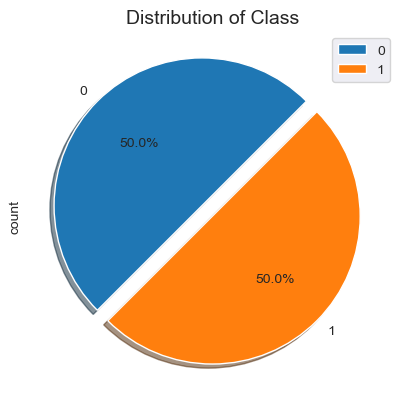

In [21]:
data['Class'].value_counts().plot.pie(explode=[0.1,0],autopct='%3.1f%%',shadow=True, legend= True,startangle =45)
plt.title('Distribution of Class',size=14)
plt.show()

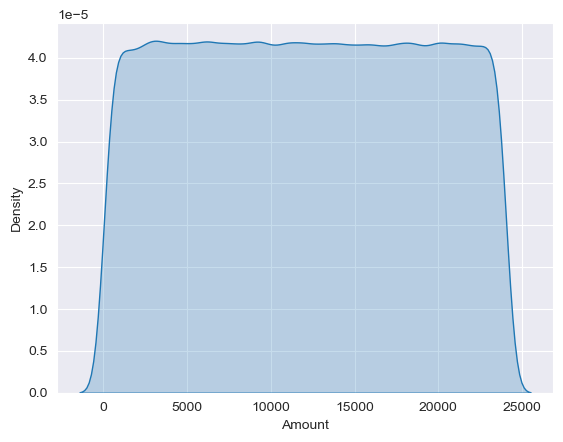

In [22]:
# Truc quan hoa su phan bo cua bien 'So luong' trong tap du lieu bang bieu đo KDE
sns.kdeplot(data = data['Amount'], fill=True)
plt.show()

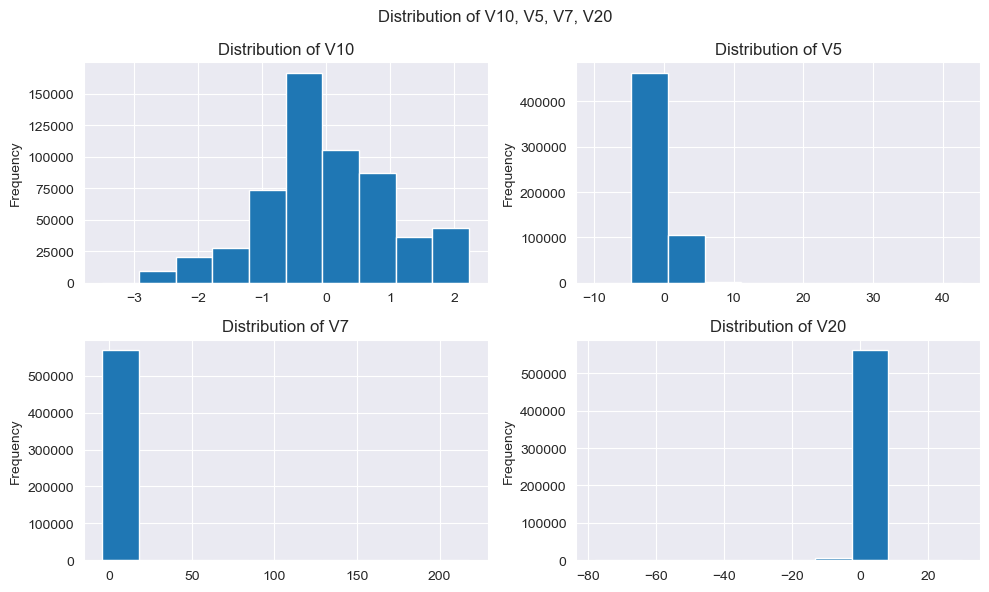

In [23]:
paper, axes = plt.subplots(2, 2, figsize=(10,6))
data['V1'].plot(kind='hist', ax = axes[0,0], title = 'Distribution of V10')
data['V5'].plot(kind='hist', ax = axes[0,1], title = 'Distribution of V5')
data['V7'].plot(kind='hist', ax = axes[1,0], title = 'Distribution of V7')
data['V20'].plot(kind='hist', ax = axes[1,1], title = 'Distribution of V20')
plt.suptitle('Distribution of V10, V5, V7, V20')
plt.tight_layout()

Tóm lại, dữ liệu thể hiện các đặc điểm có độ lệch dương, với một số đặc điểm hiển thị độ lệch rõ rệt hơn so với các đặc điểm khác. Không có bằng chứng nào về dữ liệu bị sai lệch tiêu cực và một số tính năng nhất định dường như có sự phân bố đối xứng.

In [24]:
# Phan phoi giao dich hop phap & giao dich gian lan
data['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [25]:
# Tach du lieu de phan tich
not_fraud = data[data.Class == 0]
fraud = data[data.Class == 1]

print("Not fraud :", not_fraud.shape)
print("Fraud :", fraud.shape)

Not fraud : (284315, 31)
Fraud : (284315, 31)


In [26]:
not_fraud.Amount.describe()

count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

In [27]:
fraud.Amount.describe()

count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [28]:
# So sanh gia tri cua ca 2 giao dich
data.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,142442.987714,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,...,-0.179851,-0.10964,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


In [29]:
not_fraud_sample = not_fraud.sample(n=492) # Lay mau ngau nhien gom 492 hang tu DataFrame not_fraud
new_dataset = pd.concat([not_fraud_sample, fraud], axis=0)
new_dataset.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223730,223730,-1.054066,1.076296,-0.695698,-1.312985,-0.259159,0.097056,-0.140424,0.774173,0.563882,...,-0.064637,-0.645807,0.421220,-0.526229,0.875520,0.627322,-1.371102,0.106436,14819.99,0
112410,112410,-0.385577,0.032219,1.002128,-0.577545,-0.221740,0.586133,0.087706,0.193908,0.503556,...,-0.015321,0.049698,0.018333,0.062106,-0.374155,0.498568,-1.231283,-0.514757,11694.52,0
132017,132017,-0.357142,-0.718969,1.416419,-1.574075,0.240596,0.889799,0.281141,0.094424,1.267394,...,0.121655,1.375646,0.191985,-1.007384,-0.658751,-1.649472,-0.086744,-0.185481,21378.78,0
26043,26043,-0.202017,-0.405877,1.226985,-0.716179,0.987355,0.572985,0.544235,-0.065655,0.208662,...,-0.022888,0.175172,-0.292633,-1.936329,0.615090,-0.848938,-0.189009,0.104979,1322.26,0
134650,134650,0.994853,-0.403921,0.805455,-0.382731,0.033452,-0.013160,0.393192,-0.153211,0.466813,...,-0.187054,-0.651062,0.144501,1.059257,0.111847,0.169877,-0.283417,-0.080293,5107.89,0


In [30]:
new_dataset.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [31]:
new_dataset['Class'].value_counts()

Class
1    284315
0       492
Name: count, dtype: int64

In [32]:
new_dataset.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,145072.851626,0.482464,-0.530250,0.668040,-0.742008,0.334663,0.495911,0.540744,-0.144011,0.616769,...,-0.121709,-0.116407,0.003606,-0.036433,0.124568,-0.059967,-0.010885,-0.230794,-0.101363,11882.027012
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.109640,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


In [33]:
# He so tuong quan giua So luong & Loai
correlation = data['Amount'].corr(data['Class'])
print('correaltion coefficient between Amount and Class:',correlation)

correaltion coefficient between Amount and Class: 0.002260830401554464


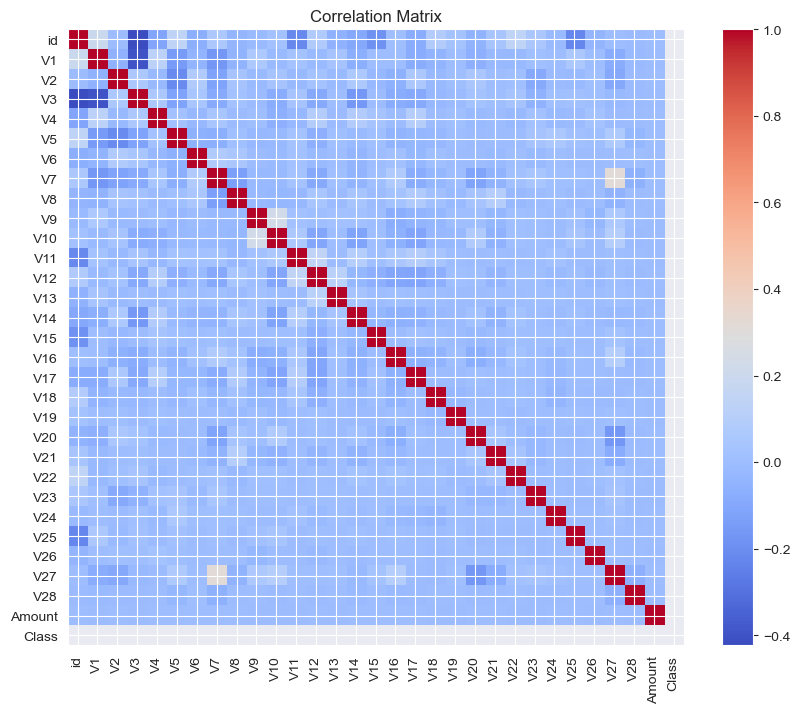

In [34]:
correlation_matrix = not_fraud.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

In [35]:
del fraud['id']

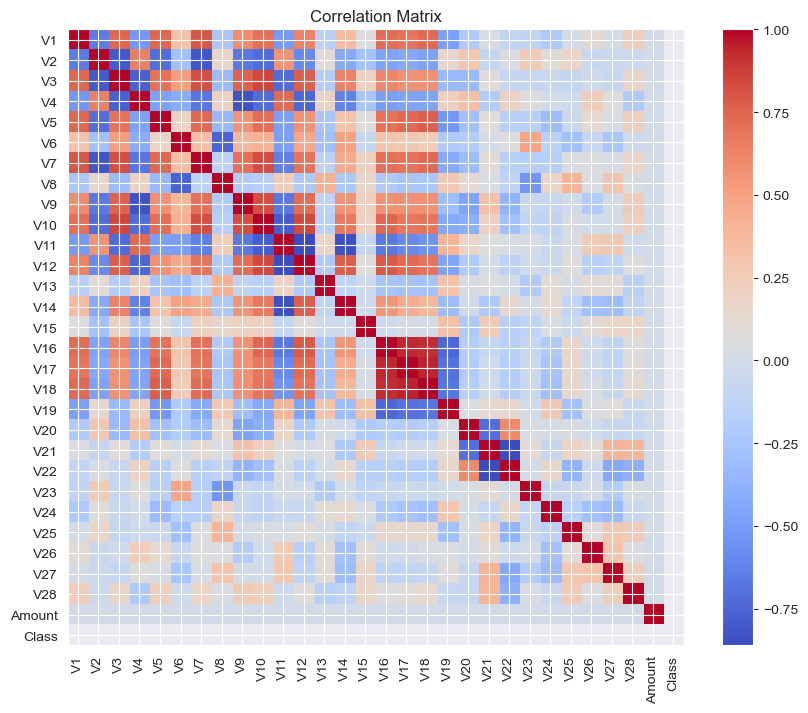

In [36]:
correlation_matrix = fraud.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

## Model Building

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [38]:
X = data.drop(['id', 'Class'], axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


In [39]:
y = data.Class
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [40]:
print('Shape of X', X.shape)
print('Shape of X', y.shape)

Shape of X (568630, 29)
Shape of X (568630,)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = StandardScaler().fit_transform(X)

# Chia du lieu thanh tinh nang va muc: X = new_dataset.drop(columns='Class', axis=1); Y = new_dataset['Class']
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285


In [43]:
import gc
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import svm

# Chia tap du lieu thanh huan luyen va kiem tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size = 0.2, random_state = 5, stratify = y)

print(X_train.shape)
print(X.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(454904, 29)
(568630, 29)
(113726, 29)
(454904,)
(113726,)


In [44]:
print(len(y_train))
print(len(y_test))

454904
113726


### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def model_eval(actual, predicted):
    conf_matrix = confusion_matrix(actual, predicted)
    clas_rep = classification_report(actual, predicted)
    print(conf_matrix)
    print(clas_rep)

lr_predictions_train = LR.predict(X_train)
lr_predictions_test = LR.predict(X_test)

In [50]:
# Do chinh xac cua du lieu dao tao
X_train_prediction = LR.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

print('Accuracy on Training data : ', round(training_data_accuracy, 2))

Accuracy on Training data :  0.96


In [51]:
print('------------------Training Accuracy------------------')
model_eval(y_train, X_train_prediction)

------------------Training Accuracy------------------
[[222530   4922]
 [ 11090 216362]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    227452
           1       0.98      0.95      0.96    227452

    accuracy                           0.96    454904
   macro avg       0.97      0.96      0.96    454904
weighted avg       0.97      0.96      0.96    454904



In [52]:
# Do chinh xac cua du lieu thu nghiem
X_test_prediction = LR.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy score on Test Data : ', round(test_data_accuracy, 2))

Accuracy score on Test Data :  0.97


In [55]:
print('------------------Training Accuracy------------------')
model_eval(y_test, X_test_prediction)

------------------Training Accuracy------------------
[[55709  1154]
 [ 2747 54116]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.97     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
from sklearn.metrics import accuracy_score

def model_eval(actual, predicted):
    acc_score = accuracy_score(actual, predicted)
    conf_matrix = confusion_matrix(actual, predicted)
    clas_rep = classification_report(actual, predicted)
    print(conf_matrix)
    print(clas_rep)

X_train_prediction = DT.predict(X_train)
X_test_prediction = DT.predict(X_test)

In [58]:
# Do chinh xac cua du lieu dao tao
X_train_prediction = DT.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

print('Accuracy on Training data : ', round(training_data_accuracy, 2))

Accuracy on Training data :  1.0


In [59]:
print('------------------Training Accuracy------------------')
model_eval(y_train, X_train_prediction)

------------------Training Accuracy------------------
[[227452      0]
 [     0 227452]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227452
           1       1.00      1.00      1.00    227452

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



In [60]:
# Do chinh xac cua du lieu thu nghiem
X_test_prediction = DT.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy on Test data : ', round(test_data_accuracy, 2))

Accuracy on Test data :  1.0


In [61]:
print('------------------Training Accuracy------------------')
model_eval(y_test, X_test_prediction)

------------------Training Accuracy------------------
[[56696   167]
 [   69 56794]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def model_eval(actual, predicted):
    acc_score = accuracy_score(actual, predicted)
    conf_matrix = confusion_matrix(actual, predicted)
    clas_rep = classification_report(actual, predicted)
    print(conf_matrix)
    print(clas_rep)

X_train_prediction = RF.predict(X_train)
X_test_prediction = RF.predict(X_test)

In [79]:
# Do chinh xac cua du lieu dao tao
X_train_prediction = RF.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

print('Accuracy on Training data : ', round(training_data_accuracy, 2))

Accuracy on Training data :  1.0


In [80]:
print('------------------Training Accuracy------------------')
model_eval(y_train, X_train_prediction)

-------------------Training Accuracy-------------------
[[227452      0]
 [     0 227452]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227452
           1       1.00      1.00      1.00    227452

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



In [83]:
# Do chinh xac cua du lieu thu nghiem
X_test_prediction = RF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy on Test data : ', round(test_data_accuracy, 2))

Accuracy on Test data :  1.0


In [84]:
print('------------------Training Accuracy------------------')
model_eval(y_test, X_test_prediction)

-------------------Training Accuracy-------------------
[[56857     6]
 [    0 56863]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



### Kết luận:
Phát hiện gian lận trong giao dịch thẻ tín dụng là một vấn đề quan trọng đòi hỏi các mô hình máy học mạnh mẽ và được hiệu chỉnh tốt. Cách tiếp cận được mô tả ở trên nhằm phát triển một mô hình hiệu quả và hiệu quả có khả năng bảo vệ khách hàng và giảm thiểu tổn thất tài chính cho các công ty thẻ tín dụng.